In [15]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the red-wine dataset
data = pd.read_csv('red_wine.csv')

# Display the first few rows of the dataset to identify the correct target column
print(data.head())

# Replace 'replace_with_actual_target_column_name' with the correct target column name
target_column_name = 'type'  # Replace with the correct target column name

# Ensure the target column is present in the dataset
if target_column_name not in data.columns:
    raise KeyError(f"'{target_column_name}' not found in the dataset")

X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Initialize the result DataFrame
result_df = pd.DataFrame(index=['AUC', 'Accuracy'], columns=['Model', 'Baseline'] + list(models.keys()))

# Set the 'Model' and 'Baseline' columns
result_df['Model'] = ['AUC', 'Accuracy']
result_df['Baseline'] = [0.5, accuracy_score(y, [y.mode()] * len(y))]

# Loop through each model and calculate performance metrics
for model_name, model in models.items():
    # AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    result_df.at['AUC', model_name] = auc_scores.mean()

    # Accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    result_df.at['Accuracy', model_name] = accuracy_scores.mean()

# Print the result DataFrame
print(result_df)


   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low
             Model  Baseline Logistic Regression Naive Bayes Decision Tree  \
AUC            AUC  0.500000            0.875819    0.893291      0.804118   
Accuracy  Accuracy  0.528897            0.784392    0.824773      0.817665   

         SVM-Linear   SVM-RBF Random Forest  
AUC        0.875446  0.855024      0.917476  
Accuracy   0.793134  0.535844       0.84389  


C:\Users\nahom\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


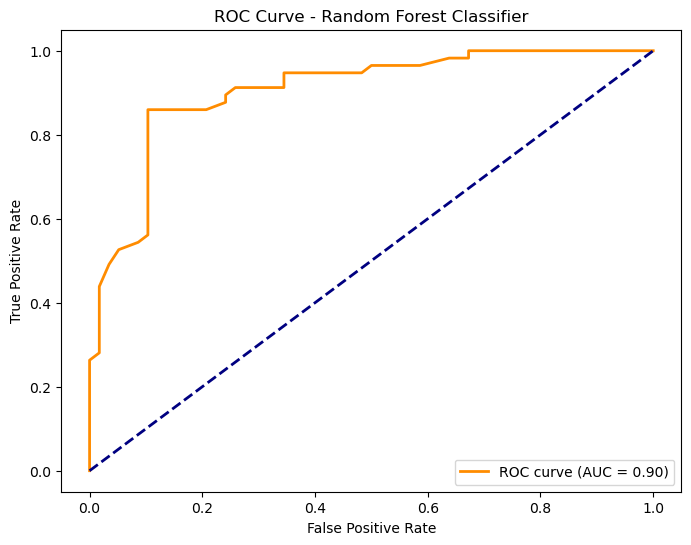

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Load the red-wine dataset
data = pd.read_csv('red_wine.csv')

# Replace 'type' with the correct target column name
target_column_name = 'type'  # Replace with the correct target column name

# Ensure the target column is present in the dataset
if target_column_name not in data.columns:
    raise KeyError(f"'{target_column_name}' not found in the dataset")

X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

# Convert categorical labels to binary format
label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the red-wine dataset
data = pd.read_csv('white_wine.csv')

# Display the first few rows of the dataset to identify the correct target column
print(data.head())

# Replace 'replace_with_actual_target_column_name' with the correct target column name
target_column_name = 'type'  # Replace with the correct target column name

# Ensure the target column is present in the dataset
if target_column_name not in data.columns:
    raise KeyError(f"'{target_column_name}' not found in the dataset")

X = data.drop(target_column_name, axis=1)
y = data[target_column_name]

# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Initialize the result DataFrame
result_df = pd.DataFrame(index=['AUC', 'Accuracy'], columns=['Model', 'Baseline'] + list(models.keys()))

# Set the 'Model' and 'Baseline' columns
result_df['Model'] = ['AUC', 'Accuracy']
result_df['Baseline'] = [0.5, accuracy_score(y, [y.mode()] * len(y))]

# Loop through each model and calculate performance metrics
for model_name, model in models.items():
    # AUC
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    result_df.at['AUC', model_name] = auc_scores.mean()

    # Accuracy
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    result_df.at['Accuracy', model_name] = accuracy_scores.mean()

# Print the result DataFrame
print(result_df)


   citric acid  sulphates  alcohol type
0         0.24       0.52      9.4  low
1         0.49       0.56      9.4  low
2         0.66       0.73     10.0  low
3         0.32       0.77     10.0  low
4         0.38       0.82     10.0  low
             Model  Baseline Logistic Regression Naive Bayes Decision Tree  \
AUC            AUC  0.500000            0.966667    0.991667      0.858333   
Accuracy  Accuracy  0.782051            0.860714    0.910714        0.8875   

         SVM-Linear   SVM-RBF Random Forest  
AUC        0.991667  0.708333        0.9875  
Accuracy   0.860714  0.783929      0.898214  
